# Diabetes Classification - Models
[Jose R. Zapata](https://joserzapata.github.io)
- https://joserzapata.github.io
- https://twitter.com/joserzapata
- https://www.linkedin.com/in/jose-ricardo-zapata-gonzalez/       


## Introduction


Analyze factors related to readmission as well as other outcomes pertaining to patients in order to classify a patient-hospital outcome

3 different outputs:

1. No readmission

2. A readmission in less than `30` days (this situation is not good, because maybe your treatment was not appropriate);

3. A readmission in more than 30 days (this one is not so good as well the last one, however, the reason could be the state of the patient.


## Main Objective

> **How effective was the treatment received in hospital?**

## Principal References

### Paper

Beata Strack, Jonathan P. DeShazo, Chris Gennings, Juan L. Olmo, Sebastian Ventura, Krzysztof J. Cios, and John N. Clore, “Impact of HbA1c Measurement on Hospital Readmission Rates: Analysis of 70,000 Clinical Database Patient Records,” BioMed Research International, vol. 2014, Article ID 781670, 11 pages, 2014.

https://www.hindawi.com/journals/bmri/2014/781670/

### Dataset

https://archive.ics.uci.edu/ml/datasets/Diabetes+130-US+hospitals+for+years+1999-2008#

### Data description

https://www.hindawi.com/journals/bmri/2014/781670/tab1/

# Import libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn import model_selection
import plotly.express as px

# Load Dataset

In [3]:
data = pd.read_csv("../data/processed/data_imbalanced.csv")

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53214 entries, 0 to 53213
Data columns (total 43 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   race                      53214 non-null  object
 1   gender                    53214 non-null  int64 
 2   age                       53214 non-null  object
 3   admission_type_id         53214 non-null  int64 
 4   discharge_disposition_id  53214 non-null  int64 
 5   admission_source_id       53214 non-null  int64 
 6   time_in_hospital          53214 non-null  int64 
 7   medical_specialty         53214 non-null  object
 8   num_lab_procedures        53214 non-null  int64 
 9   num_procedures            53214 non-null  int64 
 10  num_medications           53214 non-null  int64 
 11  number_outpatient         53214 non-null  int64 
 12  number_emergency          53214 non-null  int64 
 13  number_inpatient          53214 non-null  int64 
 14  diag_1                

## Encode categorical colums

In [5]:
cat_cols = list(data.select_dtypes('object').columns)
class_dict = {}
for col in cat_cols:
    data = pd.concat([data.drop(col, axis=1), pd.get_dummies(data[col], prefix=col, drop_first=True)], axis=1)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53214 entries, 0 to 53213
Data columns (total 85 columns):
 #   Column                                             Non-Null Count  Dtype
---  ------                                             --------------  -----
 0   gender                                             53214 non-null  int64
 1   admission_type_id                                  53214 non-null  int64
 2   discharge_disposition_id                           53214 non-null  int64
 3   admission_source_id                                53214 non-null  int64
 4   time_in_hospital                                   53214 non-null  int64
 5   num_lab_procedures                                 53214 non-null  int64
 6   num_procedures                                     53214 non-null  int64
 7   num_medications                                    53214 non-null  int64
 8   number_outpatient                                  53214 non-null  int64
 9   number_emergency            

## Input and output data

Get the names of input features and output feature

In [7]:
X = data.drop("readmitted", axis=1)
y= data["readmitted"]

In [8]:
X.shape

(53214, 84)

In [9]:
y.shape

(53214,)

## Split dataset 70/30

70% to train the model
30% to test the model

Split data stratify = y because the dataset is imbalanced

In [10]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3,random_state =123, stratify=y)

In [11]:
perc_test = y_test.value_counts()[1]*100/len(y_test)
perc_train = y_train.value_counts()[1]*100/len(y_train)

print(f" Percentage of positives in test set={perc_test} , train set={perc_train}")

Percentage of positives in test set=4.046351393673661 , train set=4.0457461945287125


## Balance train data

First i'm gointo to evaluate simple machine learning models in the imbalance dataset

In [12]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=27)
X_train, y_train = sm.fit_sample(X_train, y_train)

# Simple BaseLine

In [13]:
#models

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>ROC AUC</th>
      <th>F1 Score</th>
      <th>recall_score</th>
      <th>Time Taken</th>
    </tr>
    <tr>
      <th>Model</th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>NearestCentroid</th>
      <td>0.63</td>
      <td>0.83</td>
      <td>0.49</td>
      <td>0.11</td>
    </tr>
    <tr>
      <th>DecisionTreeClassifier</th>
      <td>0.53</td>
      <td>0.92</td>
      <td>0.12</td>
      <td>0.28</td>
    </tr>
    <tr>
      <th>LinearDiscriminantAnalysis</th>
      <td>0.53</td>
      <td>0.94</td>
      <td>0.07</td>
      <td>0.23</td>
    </tr>
    <tr>
      <th>ExtraTreeClassifier</th>
      <td>0.52</td>
      <td>0.93</td>
      <td>0.08</td>
      <td>0.09</td>
    </tr>
    <tr>
      <th>LabelPropagation</th>
      <td>0.52</td>
      <td>0.93</td>
      <td>0.07</td>
      <td>60.74</td>
    </tr>
    <tr>
      <th>LabelSpreading</th>
      <td>0.52</td>
      <td>0.93</td>
      <td>0.06</td>
      <td>75.70</td>
    </tr>
    <tr>
      <th>XGBClassifier</th>
      <td>0.51</td>
      <td>0.94</td>
      <td>0.02</td>
      <td>45.12</td>
    </tr>
    <tr>
      <th>Perceptron</th>
      <td>0.51</td>
      <td>0.93</td>
      <td>0.04</td>
      <td>0.17</td>
    </tr>
    <tr>
      <th>CalibratedClassifierCV</th>
      <td>0.50</td>
      <td>0.94</td>
      <td>0.01</td>
      <td>28.87</td>
    </tr>
    <tr>
      <th>DummyClassifier</th>
      <td>0.50</td>
      <td>0.92</td>
      <td>0.05</td>
      <td>0.06</td>
    </tr>
    <tr>
      <th>LogisticRegression</th>
      <td>0.50</td>
      <td>0.94</td>
      <td>0.01</td>
      <td>0.25</td>
    </tr>
    <tr>
      <th>BaggingClassifier</th>
      <td>0.50</td>
      <td>0.94</td>
      <td>0.01</td>
      <td>1.42</td>
    </tr>
    <tr>
      <th>KNeighborsClassifier</th>
      <td>0.50</td>
      <td>0.94</td>
      <td>0.01</td>
      <td>38.69</td>
    </tr>
    <tr>
      <th>PassiveAggressiveClassifier</th>
      <td>0.50</td>
      <td>0.92</td>
      <td>0.04</td>
      <td>0.13</td>
    </tr>
    <tr>
      <th>LGBMClassifier</th>
      <td>0.50</td>
      <td>0.94</td>
      <td>0.00</td>
      <td>82.92</td>
    </tr>
    <tr>
      <th>LinearSVC</th>
      <td>0.50</td>
      <td>0.94</td>
      <td>0.00</td>
      <td>8.18</td>
    </tr>
    <tr>
      <th>RidgeClassifier</th>
      <td>0.50</td>
      <td>0.94</td>
      <td>0.00</td>
      <td>0.11</td>
    </tr>
    <tr>
      <th>RidgeClassifierCV</th>
      <td>0.50</td>
      <td>0.94</td>
      <td>0.00</td>
      <td>0.19</td>
    </tr>
    <tr>
      <th>AdaBoostClassifier</th>
      <td>0.50</td>
      <td>0.94</td>
      <td>0.00</td>
      <td>1.32</td>
    </tr>
    <tr>
      <th>GaussianNB</th>
      <td>0.50</td>
      <td>0.01</td>
      <td>1.00</td>
      <td>0.08</td>
    </tr>
    <tr>
      <th>QuadraticDiscriminantAnalysis</th>
      <td>0.50</td>
      <td>0.01</td>
      <td>1.00</td>
      <td>0.18</td>
    </tr>
    <tr>
      <th>CheckingClassifier</th>
      <td>0.50</td>
      <td>0.94</td>
      <td>0.00</td>
      <td>0.06</td>
    </tr>
    <tr>
      <th>RandomForestClassifier</th>
      <td>0.50</td>
      <td>0.94</td>
      <td>0.00</td>
      <td>3.30</td>
    </tr>
    <tr>
      <th>SGDClassifier</th>
      <td>0.50</td>
      <td>0.94</td>
      <td>0.00</td>
      <td>0.26</td>
    </tr>
    <tr>
      <th>SVC</th>
      <td>0.50</td>
      <td>0.94</td>
      <td>0.00</td>
      <td>145.44</td>
    </tr>
    <tr>
      <th>ExtraTreesClassifier</th>
      <td>0.50</td>
      <td>0.94</td>
      <td>0.00</td>
      <td>3.25</td>
    </tr>
    <tr>
      <th>BernoulliNB</th>
      <td>0.50</td>
      <td>0.94</td>
      <td>0.00</td>
      <td>0.10</td>
    </tr>
  </tbody>
</table>

# MODELS

## Evaluation Metric

The selected evaluation metric is the 
> **Recall - Sensitivity**

A False Negative might delay more tests or treatment, 
however a False Positive may just lead to more tests or treatments – not as costly as putting a life at stake.


In [14]:
# Evaluation
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

Interpretability is important so first intents will be with classic Machine Learning Models, No ensembles, No Neural Networks

In [15]:
# Selected algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

## Model Selection

In [16]:
seed =2
models = []
#logistic Regression
models.append(('LR', LogisticRegression(solver='liblinear')))

# Decision Tree classifier
models.append(('CART', DecisionTreeClassifier()))
# Naïve Bayes
models.append(('NB', GaussianNB()))
# SVM
models.append(('SVM', SVC(C=1.0, kernel='rbf', max_iter=1000, tol=1e-3)))
# evaluate each model in turn
results = []
names = []
scoring = 'recall'
for name, model in models:
	# Kfol cross validation for model selection
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	#X train , y train
	cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = f"({name}, {cv_results.mean()}, {cv_results.std()}"
	print(msg)

(LR, 0.5098328090056121, 0.43857857004740386
(CART, 0.6299254030753485, 0.3604513129535755
(NB, 0.7173422239234163, 0.2592485698869551
(SVM, 0.7723377519209549, 0.014046238247785262


## Results

In [17]:
result_df = pd.DataFrame(results, index=names).T
px.box(result_df,title = 'Algorithm Comparison')

# Hyper Parameter optimization


In [18]:
from sklearn.model_selection import GridSearchCV

In [19]:
#priors calculation
y.value_counts()/len(y)

0    0.959541
1    0.040459
Name: readmitted, dtype: float64

In [20]:
a,b = y.value_counts()/len(y)

In [21]:

parameters = {'priors': [None, [a,b]]}

grid_search = GridSearchCV(GaussianNB(), parameters, cv=10, return_train_score=True)
grid_search.fit(X_train, y_train)

grid_search.best_params_

{'priors': [0.9595407223662946, 0.040459277633705416]}

In [23]:
grid_search.best_score_

0.7802734335097445

In [25]:
NB_best = grid_search.best_estimator_

# Final evaluation Test set

In [31]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

## Naïve Bayes

In [27]:
NB_best.fit(X_train,y_train)
y_pred = NB_best.predict(X_test)

In [28]:
print(classification_report(y_test, y_pred))

precision    recall  f1-score   support

           0       0.96      0.61      0.75     15319
           1       0.05      0.45      0.08       646

    accuracy                           0.60     15965
   macro avg       0.50      0.53      0.42     15965
weighted avg       0.93      0.60      0.72     15965



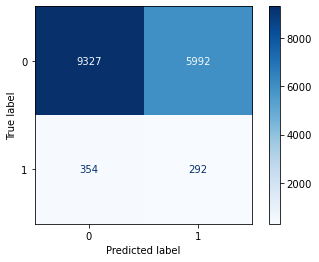

In [29]:
plot_confusion_matrix(NB_best, X_test, y_test,cmap=plt.cm.Blues); 

In [32]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
sensitivity = tp / (tp+fn)
sensitivity

0.4520123839009288

# Save Model

In [ ]:
from joblib import dump # libreria de serializacion

# garbar el modelo en un archivo
dump(NB, '../models/NB_balance_recall.joblib')

The model created with the imbalanced data has better sensitivity

# References

- Correction to: Hospital Readmission of Patients with Diabetes - https://link.springer.com/article/10.1007/s11892-018-0989-1

- Center for disease control and prevention, Diabetes atlas- https://gis.cdc.gov/grasp/diabetes/DiabetesAtlas.html

- https://medium.com/@joserzapata/paso-a-paso-en-un-proyecto-machine-learning-bcdd0939d387
- [a-complete-machine-learning-walk-through-in-python-part-one](https://towardsdatascience.com/a-complete-machine-learning-walk-through-in-python-part-one-c62152f39420)

- https://www.kaggle.com/vignesh1609/readmission-classification-model

- https://www.kaggle.com/kavyarall/predicting-effective-treatments/

[Jose R. Zapata](https://joserzapata.github.io)
- https://joserzapata.github.io
- https://twitter.com/joserzapata
- https://www.linkedin.com/in/jose-ricardo-zapata-gonzalez/   